[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mGXCNLa1hkdcmcMnQz3tg8mqb_NkFOFe?usp=sharing)

## (Extra) Numpy tricks

Problem: implement 2x2 rolling window for given 2d array 

In [1]:
import numpy as np

x = np.arange(100).reshape(10, 10)
x.shape, x.strides

((10, 10), (80, 8))

Solution:

In [2]:
a2 = np.lib.stride_tricks.as_strided(x, shape=(9, 9, 2, 2), strides=(40, 4, 40, 4))

In [3]:
print(a2[0, 0])
print(a2[1, 1])

[[          0  4294967296]
 [          5 25769803776]]
[[25769803776           6]
 [47244640256          11]]


Usage: average 2d matrix over 2x2 windows:  

In [4]:
a2.mean(axis=(-2, -1))

array([[7.51619277e+09, 7.51619277e+09, 9.66367642e+09, 9.66367642e+09,
        1.18111601e+10, 1.18111601e+10, 1.39586437e+10, 1.39586437e+10,
        1.61061274e+10],
       [1.82536110e+10, 1.82536110e+10, 2.04010947e+10, 2.04010947e+10,
        2.25485783e+10, 2.25485783e+10, 2.46960620e+10, 2.46960620e+10,
        2.68435456e+10],
       [2.89910293e+10, 2.89910293e+10, 3.11385129e+10, 3.11385129e+10,
        3.32859966e+10, 3.32859966e+10, 3.54334802e+10, 3.54334802e+10,
        3.75809638e+10],
       [3.97284475e+10, 3.97284475e+10, 4.18759311e+10, 4.18759311e+10,
        4.40234148e+10, 4.40234148e+10, 4.61708984e+10, 4.61708984e+10,
        4.83183821e+10],
       [5.04658657e+10, 5.04658657e+10, 5.26133494e+10, 5.26133494e+10,
        5.47608330e+10, 5.47608330e+10, 5.69083167e+10, 5.69083167e+10,
        5.90558003e+10],
       [6.12032840e+10, 6.12032840e+10, 6.33507676e+10, 6.33507676e+10,
        6.54982513e+10, 6.54982513e+10, 6.76457349e+10, 6.76457349e+10,
        6.9

# Matplotlib

In [5]:
import matplotlib.pyplot as plt

### Basic charts

![](https://qph.fs.quoracdn.net/main-qimg-e649ba1703fef26b52964b58c7f7f2b3)

### Chart selection roadmap

![](http://blog.atkcg.ru/wp-content/uploads/2015/07/1-%D0%B9-%D1%81%D0%BB%D0%B0%D0%B9%D0%B41.jpg)

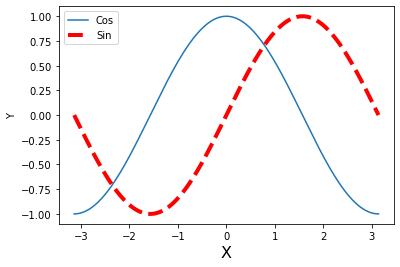

In [6]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

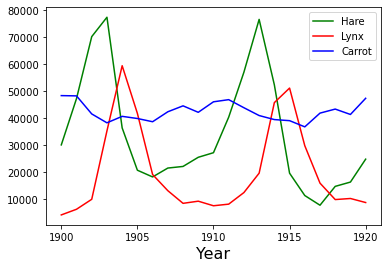

In [7]:
import matplotlib.pyplot as plt
import numpy as np
url = 'http://scipy-lectures.org/_downloads/populations.txt'
data = np.loadtxt(url,  dtype=object)
data = data.astype(float)
data
plt.plot(data[:,0],data[:,1],label='Hare', color='green')
plt.plot(data[:,0],data[:,2],label='Lynx', color='red')
plt.plot(data[:,0],data[:,3],label='Carrot', color='blue')
plt.xticks(np.arange(1900,1921,5))
plt.xlabel('Year',fontsize=16)
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

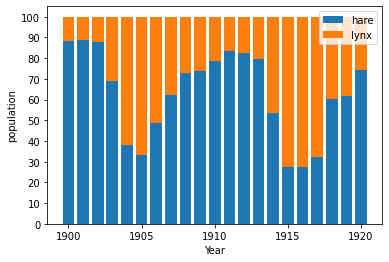

In [8]:
hare=data[:,1]
lynx=data[:,2]
carrot=data[:,3]
year=data[:,0]
plt.bar(year,100*hare/(hare+lynx),label='hare')
plt.bar(year, 100*lynx/(hare+lynx),label='lynx', bottom=100*hare/(hare+lynx))
plt.xlabel('Year')
plt.ylabel('population')
plt.yticks(np.arange(0,101,10))
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

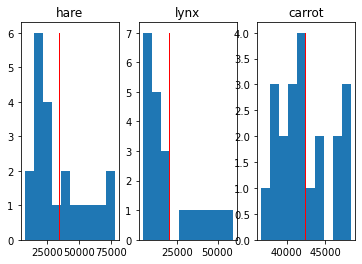

In [9]:
fig,(h,l,c)=plt.subplots(1,3)
h.hist(hare)
h.hist(np.zeros(6)+hare.mean(),width=1000, color='r')
h.set_title('hare')
l.hist(lynx)
l.hist(np.zeros(7)+lynx.mean(),width=500, color='r')
l.set_title('lynx')
c.hist(carrot)
c.hist(np.zeros(4)+carrot.mean(),width=100, color='r')
c.set_title('carrot')
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

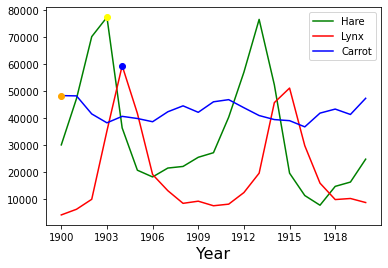

In [10]:
plt.plot(data[:,0],data[:,1],label='Hare', color='green')
plt.plot(data[:,0],data[:,2],label='Lynx', color='red')
plt.plot(data[:,0],data[:,3],label='Carrot', color='blue')
plt.plot(np.argmax(hare)+1900,np.max(hare),'ro', color='yellow')
plt.plot(np.argmax(lynx)+1900,np.max(lynx),'ro', color='blue')
plt.plot(np.argmax(carrot)+1900,np.max(carrot),'ro', color='orange')
plt.xticks(np.arange(1900,1921,3))
plt.xlabel('Year',fontsize=16)
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


([<matplotlib.patches.Wedge at 0x7ffcd78c9bb0>,
 [Text(-0.6858388280562521, 0.8600145940217683, 'hare'),
  Text(0.6858389085766268, -0.860014529808899, 'lynx')])

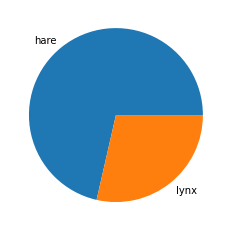

In [11]:
dif=hare-lynx
mask=hare>lynx
con=np.zeros(21)
con[mask]=1
h=con.sum()
a='H'
b='L'
I=np.where(dif>0,a,b)
print(I)
plt.pie([h,21-h],labels=('hare','lynx'))

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

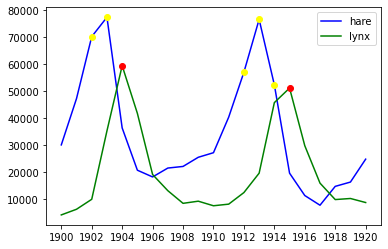

In [12]:
mask1=hare>50000
mask2=lynx>50000
h=hare[mask1]
l=lynx[mask2]
plt.plot(year,hare,color='blue',label='hare')
plt.plot(year,lynx,color='green',label='lynx')
plt.plot(year[mask1],h,'ro',color='yellow')
plt.plot(year[mask2],l,'ro',color='red')
plt.xticks(np.arange(1900,1921,2))
plt.legend()
plt.show()

Find the top 2 years for each species when they had the lowest populations.

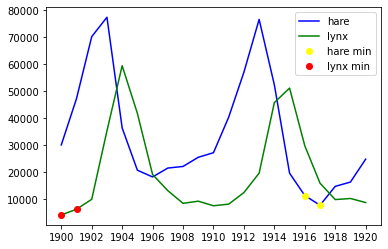

In [13]:
h=np.copy(hare)
l=np.copy(lynx)
h1=np.argmin(h)
h[h1]=np.max(h)
h2=np.argmin(h)
l1=np.argmin(l)
l[l1]=np.max(l)
l2=np.argmin(l)

plt.plot(year,hare,color='blue',label='hare')
plt.plot(year,lynx,color='green',label='lynx')
plt.plot(year[h1],hare[h1],'ro',color='yellow',label='hare min')
plt.plot(year[h2],hare[h2],'ro',color='yellow')
plt.plot(year[l1],lynx[l1],'ro',color='red')
plt.plot(year[l2],lynx[l2],'ro',color='red',label='lynx min')
plt.xticks(np.arange(1900,1921,2))
plt.legend()
plt.show()

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

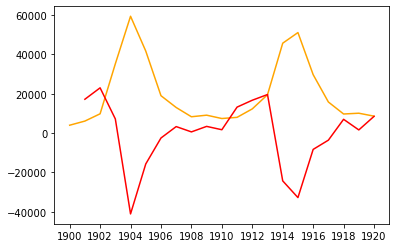

-0.6933485156220878

In [14]:
h=np.zeros(20)
l=np.zeros(20)
h=np.diff(hare)
mask=year!=year[0]
plt.plot(year,lynx,color='orange',label='lynx')
plt.plot(year[mask],h,color='r',label='diff')
plt.xticks(np.arange(1900,1921,2))
plt.show()
cor=np.corrcoef(np.diff(hare),data[:-1,2])[0][1]
cor

Show population of hares vs carrots and hares vs lynxes.

<BarContainer object of 21 artists>

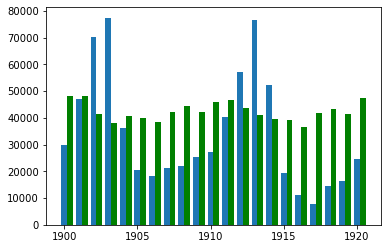

In [15]:
bw=0.4
plt.bar(year,hare,bw, label='hare')
plt.bar(year+bw,carrot,bw, label='carrot', color='g')
#plt.bar(year,carrot, label='carrot')


<BarContainer object of 21 artists>

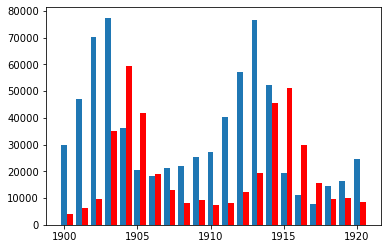

In [16]:
plt.bar(year,hare,bw, label='hare')
plt.bar(year+bw,lynx,bw, label='lynx', color='r')

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [17]:
h=hare[19]-cor*lynx[20]
print(h)
print(hare[20])
print((hare[20]-h)/hare[20])

22162.797234349957
24700.0
0.10272075974291672


## High-dimentional data visualization

What is an image?

![img](https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg)

Basically, it is an array of numbers:

In [18]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
print(np.array(img).shape)
np.array(img)

(500, 750)


array([[145, 145, 144, ..., 142, 143, 144],
       [146, 146, 146, ..., 141, 143, 144],
       [146, 147, 146, ..., 140, 142, 143],
       ...,
       [114, 111, 120, ...,  78,  69,  56],
       [ 75,  83, 104, ...,  53,  51,  64],
       [ 63,  82, 108, ..., 101,  95,  94]], dtype=uint8)

What if we take a random point in a 500*750 dimentional space? Will it be a meaningful image?

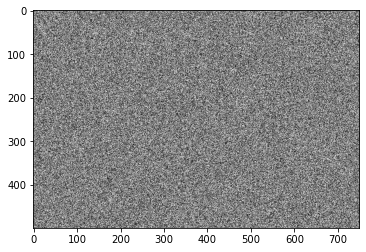

In [19]:
sample_img = np.random.choice(np.arange(256), size=500*750).reshape(500, 750)
plt.imshow(sample_img, cmap='gray')
plt.show()

Meaningful images are very rare subset (manifold?) in a space of all possible images. Can we explore a structure of this subset?

Get the MNIST dataset:

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [21]:
images = digits.data.reshape(-1, 8, 8)

Look at some items in the dataset:

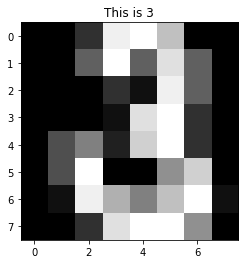

In [22]:
i = 985
plt.imshow(images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

Let's find a good projection plane for our data:

![img](https://i.stack.imgur.com/G7Gkv.png)

What is good actually?

![img](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

For detailed derivation of PCA look https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture7.pdf

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_transformed.shape

(1797, 10)

Variances along eigenvectors:

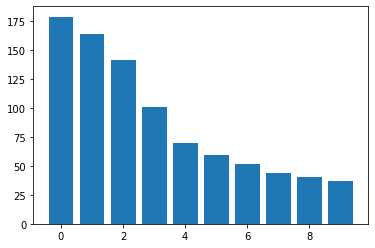

In [24]:
plt.bar(np.arange(10), pca.explained_variance_)
plt.show()

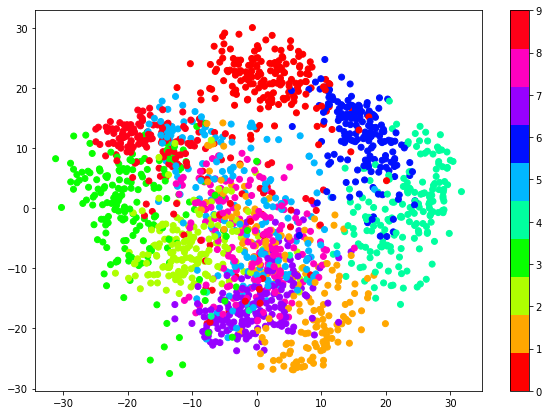

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

Make the projection manually. What we need are basis vectors and mean shift:

In [26]:
pca.components_.shape, pca.mean_.shape

((10, 64), (64,))

Project on a subspace of principal components:

In [27]:
proj = np.dot(digits.data.astype(float) - pca.mean_, pca.components_.T)
proj.shape

(1797, 10)

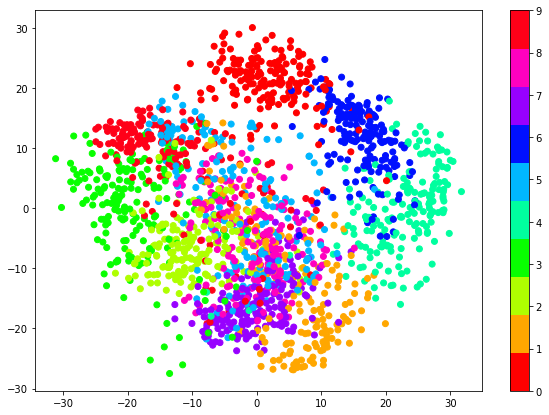

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', 10))
plt.colorbar()
plt.show()

We can plot in 3D:

<IPython.core.display.Javascript object>


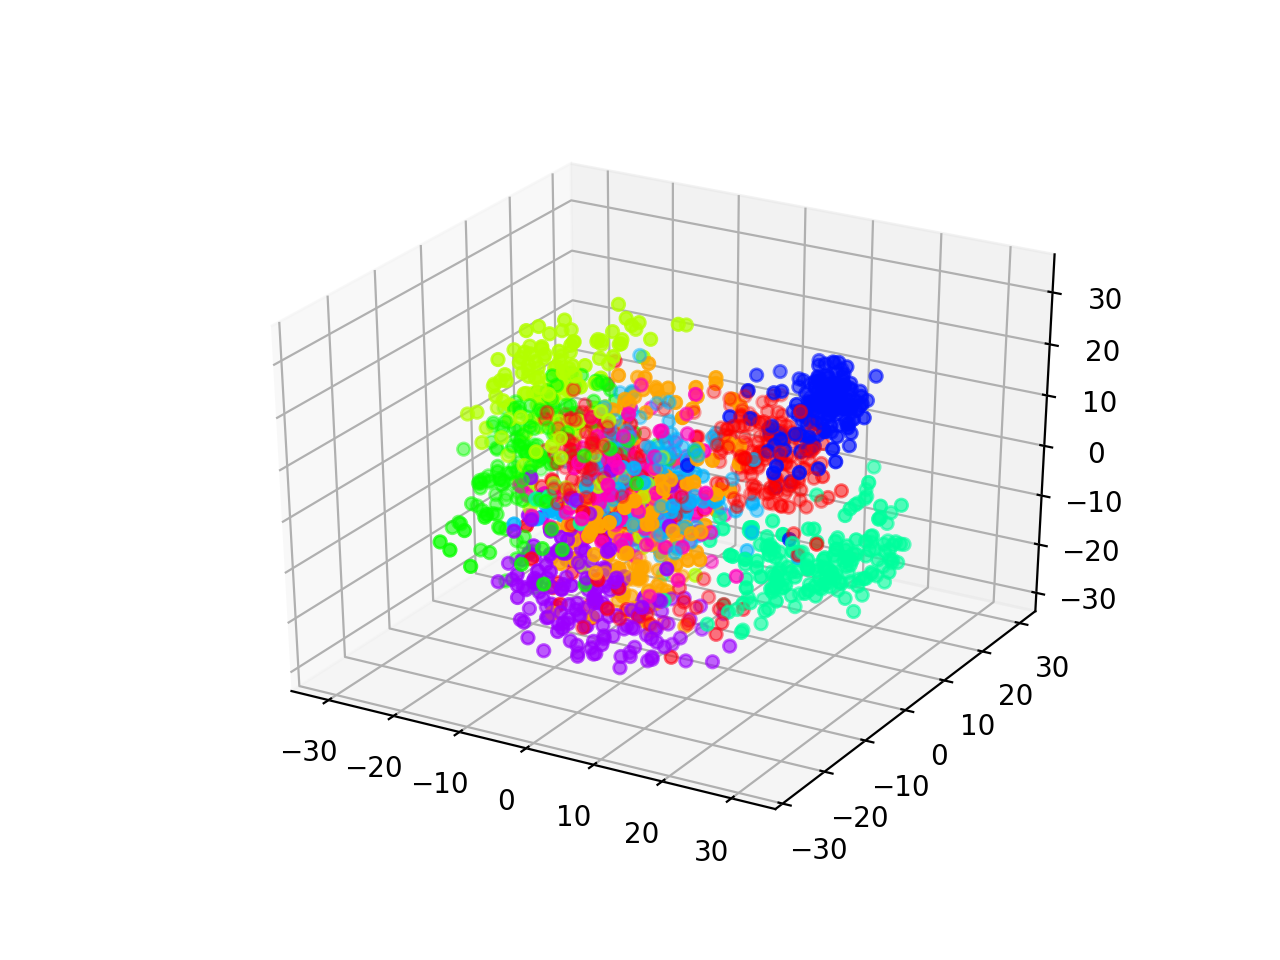

In [29]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X_transformed.T[:3], c=digits.target, cmap='hsv')
plt.show()

To what extent we can restore original data from principal components?

In [30]:
X_restored = pca.inverse_transform(X_transformed)
X_restored.shape

(1797, 64)

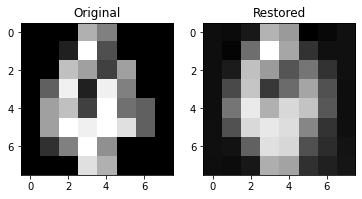

In [31]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Can you perform inverse transoformation explicitly?

In [32]:
from sklearn.datasets import fetch_openml 
digits = fetch_openml('mnist_784')

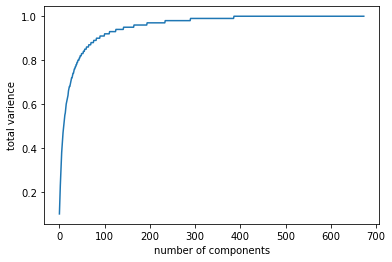

In [33]:
pca = PCA(n_components=0.999999,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
plt.plot(pca.explained_variance_ratio_.cumsum().round(2))
plt.ylabel('total varience')
plt.xlabel('number of components')
plt.show()


In [34]:
pca = PCA(n_components=0.99,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])
pca = PCA(n_components=0.95,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])
pca = PCA(n_components=0.90,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])
pca = PCA(n_components=0.85,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])

331
154
87
59


In [35]:
images = digits.data.reshape(-1, 28, 28)

In [36]:
pca = PCA(n_components=0.99,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)

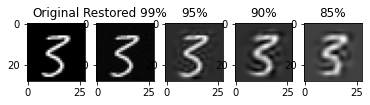

In [37]:
i = 540
fig, ax = plt.subplots(1, 5)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 99%')
pca = PCA(n_components=0.95,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[2].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[2].set_title('95%')
pca = PCA(n_components=0.9,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[3].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[3].set_title('90%')
pca = PCA(n_components=0.85,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[4].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[4].set_title('85%')
plt.show()

Homework:

1. Complete all exersices with Lynx-Rabbits dataset.
2. Plot a graph of total explained variance vs number of principal components.
3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.
4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.
    
    Hint: download full-size 28x28 MNIST images to better see a difference between original and restored images

```python
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
```

![img](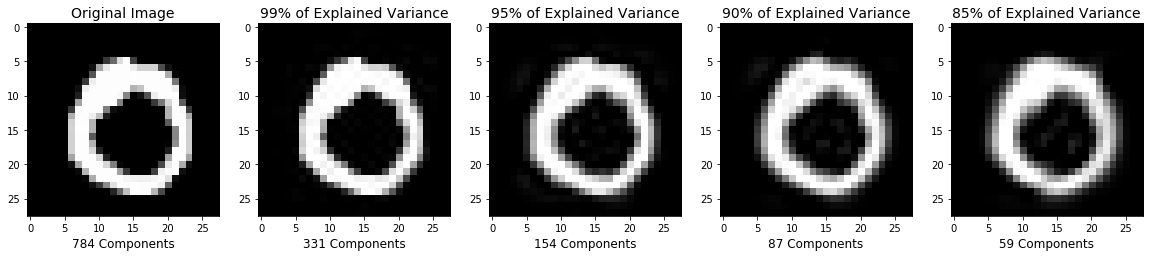%0A)

5*. Can you get a more insightful representation of MNIST dataset in 2D? For inspiration see https://colah.github.io/posts/2014-10-Visualizing-MNIST/